In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data['day'] = [t.day for t in data['Dateti']]
data['hour'] = [t.hour for t in data['Dateti']]
data['delta'] = [td.total_seconds() / 3600 for td in (data['Dateti'] - data['Dateti'][0])]

In [5]:
data.drop(data[data['hour'] == 7].index, inplace=True)
data.reset_index(inplace=True, drop=True)

# Visuals

In [6]:
def get_data(hour, lag):
    people = data[data['hour'] == hour]['ActualGC']
    x = list(people.values[:-lag])
    y = list(people.values[lag:])
    return [x,y]

In [7]:
x= []
y= []
lag = 1
for hour in range(8,23):
    x_hour, y_hour = get_data(hour, lag)
    print(hour, 'Correlation: ', np.corrcoef(x_hour, y_hour)[0][1])
    x = x + x_hour
    y = y + y_hour

8 Correlation:  0.22093275123406178
9 Correlation:  0.12561959324261365
10 Correlation:  0.16584581484981512
11 Correlation:  0.08951806350074
12 Correlation:  0.17555261754251314
13 Correlation:  0.18968117527315248
14 Correlation:  0.11460660477409154
15 Correlation:  -0.10857725555992849
16 Correlation:  0.34200823343999726
17 Correlation:  0.28030534427223874
18 Correlation:  0.12583193923635153
19 Correlation:  0.18191525927078253
20 Correlation:  0.12399132365470558
21 Correlation:  0.1694684552419365
22 Correlation:  0.20119309582055808


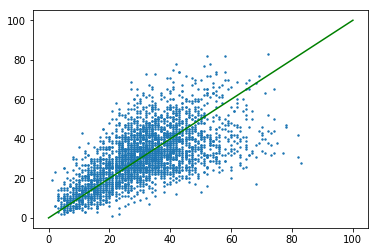

In [8]:
plt.scatter(x,y, s=2)
plt.plot([0,100], [0,100], c='green')

# Data set

In [76]:
test_size = 0.2

In [77]:
def create_dataset(hour):
    dataset = data[data['hour'] == hour]['ActualGC'].values
    train_size = int((1 - test_size) * len(dataset))
    train = dataset[:train_size]
    test = dataset[train_size:]
    return [train, test, train_size]

# Auto-Regression

In [78]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [153]:
# Projected
mean_squared_error(data['ProjGC'], data['ActualGC'])

96.71690614490981

In [161]:
lags = 2
pred = []
true = []
pred_train = []
true_train = []
for hour in range(8, 24):
    train, test, start = create_dataset(hour)
    end = len(train) + len(test) - 1
    model = AutoReg(train, lags).fit()
    print('Hour:', hour, 'Params: ', model.params)
    predictions = model.predict(start, end, dynamic=False)
    predictions_train = model.predict()
    pred += list(predictions)
    true += list(test)
    pred_train += list(predictions_train)
    true_train += list(train[lags:])

Hour: 8 Params:  [6.80910983 0.22586692 0.01419387]
Hour: 9 Params:  [ 1.33467066e+01  1.16979904e-01 -4.38064001e-03]
Hour: 10 Params:  [16.71592034  0.17185987 -0.08239842]
Hour: 11 Params:  [20.59465802  0.10449105 -0.03104489]
Hour: 12 Params:  [24.43036163  0.20705665 -0.07275117]
Hour: 13 Params:  [3.10905505e+01 1.63702557e-01 1.95541816e-02]
Hour: 14 Params:  [32.99987814  0.154853   -0.05109649]
Hour: 15 Params:  [35.79975165 -0.10664811  0.08532231]
Hour: 16 Params:  [21.34910551  0.29211763  0.08828501]
Hour: 17 Params:  [29.53446057  0.31111533 -0.11220324]
Hour: 18 Params:  [ 3.44178995e+01  1.19449639e-01 -5.85253794e-03]
Hour: 19 Params:  [40.80043524  0.21643394 -0.15235748]
Hour: 20 Params:  [49.02430614  0.16908524 -0.20802851]
Hour: 21 Params:  [3.25506877e+01 1.85300187e-01 9.19830617e-03]
Hour: 22 Params:  [25.43907231  0.26097629 -0.16688845]
Hour: 23 Params:  [7.32524219 0.40362321 0.12476104]


In [162]:
mean_squared_error(pred, true)

75.38734762471493

In [163]:
mean_squared_error(pred_train, true_train)

80.0064328359149